# **Introduction + Data analysis and visualization**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pytz

# Load and Preprocess Data

In [2]:
# Load the dataset
data_path = 'EVChargingStationUsage.csv'  # Update this path if needed
data = pd.read_csv(data_path)
data

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_35482/3663648821.py:3: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


## Data quality
#### Missing values

In [3]:
#Making a function to check for missing values, that can be called later on
def check_missing_values(df):
    missing_cols = df.isnull().sum()
    print("Missing values per column:\n", missing_cols[missing_cols > 0])

    missing_rows = df.isnull().sum(axis=1)
    total_missing = df.isnull().sum().sum()

    print(f"\nTotal missing values: {total_missing}")
    print("Total number of rows with missing values:", len(missing_rows[missing_rows > 0]))
    print("Total number of columns with missing values:", len(missing_cols[missing_cols > 0]))
    return 

check_missing_values(data)


Missing values per column:
 Transaction Date (Pacific Time)      209
Port Type                              9
EVSE ID                            78948
Currency                            1788
Ended By                             248
Driver Postal Code                  8402
User ID                             7677
County                             84665
System S/N                         78948
Model Number                       78948
dtype: int64

Total missing values: 339842
Total number of rows with missing values: 89969
Total number of columns with missing values: 10


#### Types of data (integer, strings, etc.) and unique values
Where should labels be encoded and does any columns only have one value and therefor might be excessive?

In [4]:
#Checking for types of data and showing examples of unique values
def check_unique_values(df):
    for col in df.columns:
        print(f"{col} is of type(s): {data[col].apply(type).unique()}")
        print(f"Unique values({df[col].nunique()}): {df[col].unique()}\n")

check_unique_values(data)

Station Name is of type(s): [<class 'str'>]
Unique values(47): ['PALO ALTO CA / HAMILTON #1' 'PALO ALTO CA / HAMILTON #2'
 'PALO ALTO CA / HIGH #4' 'PALO ALTO CA / BRYANT #2'
 'PALO ALTO CA / BRYANT #1' 'PALO ALTO CA / MPL #4'
 'PALO ALTO CA / MPL #6' 'PALO ALTO CA / MPL #2' 'PALO ALTO CA / MPL #1'
 'PALO ALTO CA / MPL #5' 'PALO ALTO CA / MPL #3'
 'PALO ALTO CA / RINCONADA LIB 2' 'PALO ALTO CA / RINCONADA LIB 1'
 'PALO ALTO CA / RINCONADA LIB 3' 'PALO ALTO CA / WEBSTER #1'
 'PALO ALTO CA / HIGH #1' 'PALO ALTO CA / WEBSTER #2'
 'PALO ALTO CA / TED THOMPSON #1' 'PALO ALTO CA / CAMBRIDGE #1'
 'PALO ALTO CA / BRYANT #3' 'PALO ALTO CA / WEBSTER #3'
 'PALO ALTO CA / CAMBRIDGE #2' 'PALO ALTO CA / HIGH #2'
 'PALO ALTO CA / HIGH #3' 'PALO ALTO CA / BRYANT #6'
 'PALO ALTO CA / BRYANT #4' 'PALO ALTO CA / BRYANT #5'
 'PALO ALTO CA / TED THOMPSON #4' 'PALO ALTO CA / TED THOMPSON #3'
 'PALO ALTO CA / CAMBRIDGE #5' 'PALO ALTO CA / TED THOMPSON #2'
 'PALO ALTO CA / CAMBRIDGE #3' 'PALO ALTO CA / CAMBRI

In [5]:
# Checking for number of unique values in each column
def unique_values(df):
    for col in df.columns:
            print(f"{col} has {df[col].nunique()} unique values")

def one_unique_value(df):
    singular = []
    for col in df.columns:
        if df[col].nunique() == 1:
            singular.append(col)
    print(f"Columns with only one unique value: {singular}")

one_unique_value(data)
unique_values(data)

Columns with only one unique value: ['City', 'State/Province', 'Country']
Station Name has 47 unique values
MAC Address has 83 unique values
Org Name has 2 unique values
Start Date has 244798 unique values
Start Time Zone has 3 unique values
End Date has 244159 unique values
End Time Zone has 3 unique values
Transaction Date (Pacific Time) has 240905 unique values
Total Duration (hh:mm:ss) has 31025 unique values
Charging Time (hh:mm:ss) has 22473 unique values
Energy (kWh) has 118061 unique values
GHG Savings (kg) has 15535 unique values
Gasoline Savings (gallons) has 6333 unique values
Port Type has 2 unique values
Port Number has 2 unique values
Plug Type has 2 unique values
EVSE ID has 51 unique values
Address 1 has 20 unique values
City has 1 unique values
State/Province has 1 unique values
Postal Code has 3 unique values
Country has 1 unique values
Latitude has 62 unique values
Longitude has 64 unique values
Currency has 4 unique values
Fee has 1817 unique values
Ended By has 16 

## Handling missing values, dates and data types

#### Converting dates to datetime

In [6]:
#Converting to datetime
data['Start Date'] = pd.to_datetime(data['Start Date'])  #Complete date and time
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')  #Complete date and time
data['Transaction Date (Pacific Time)'] = pd.to_datetime(data['Transaction Date (Pacific Time)'], errors='coerce') #Complete date and time
data['Total Duration (hh:mm:ss)'] = pd.to_datetime(data['Total Duration (hh:mm:ss)'], format='%H:%M:%S', errors = 'coerce').dt.time #Only time
data['Charging Time (hh:mm:ss)'] = pd.to_datetime(data['Charging Time (hh:mm:ss)'], format='%H:%M:%S').dt.time #Only time
data.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-29 20:17:00,PDT,2011-07-29 23:20:00,PDT,2011-07-29 23:20:00,03:03:32,01:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 00:00:00,PDT,2011-07-30 00:02:00,PDT,2011-07-30 00:02:00,00:02:06,00:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 08:16:00,PDT,2011-07-30 12:34:00,PDT,2011-07-30 12:34:00,04:17:32,04:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 14:51:00,PDT,2011-07-30 16:55:00,PDT,2011-07-30 16:55:00,02:03:24,02:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 18:51:00,PDT,2011-07-30 20:03:00,PDT,2011-07-30 20:03:00,01:11:24,00:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


In [7]:
data['Energy (kWh)']

0          6.249457
1          0.106588
2         14.951777
3          7.159643
4          1.957765
            ...    
259410     1.841000
259411    12.744000
259412    29.665000
259413    11.976000
259414     1.571000
Name: Energy (kWh), Length: 259415, dtype: float64

In [8]:
#Converting Charging Time to hours
data['Charging Time (hours)'] = data['Charging Time (hh:mm:ss)'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)
data['Total Duration (hours)'] = data['Total Duration (hh:mm:ss)'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

#Converting into hourly energy use
data['Energy (kWh/h)'] = data['Energy (kWh)']/data['Charging Time (hours)']

# Variable for day of week
data['Day of week'] = data['Start Date'].dt.dayofweek

data.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,Charging Time (hours),Total Duration (hours),Energy (kWh/h),Day of week
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-29 20:17:00,PDT,2011-07-29 23:20:00,PDT,2011-07-29 23:20:00,03:03:32,01:54:03,...,3,95124.0,3284.0,NaN,NaN,NaN,1.900833,3.058889,3.287746,4
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 00:00:00,PDT,2011-07-30 00:02:00,PDT,2011-07-30 00:02:00,00:02:06,00:01:54,...,4,94301.0,4169.0,NaN,NaN,NaN,0.031667,0.035000,3.365937,5
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 08:16:00,PDT,2011-07-30 12:34:00,PDT,2011-07-30 12:34:00,04:17:32,04:17:28,...,5,94301.0,4169.0,NaN,NaN,NaN,4.291111,4.292222,3.484360,5
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 14:51:00,PDT,2011-07-30 16:55:00,PDT,2011-07-30 16:55:00,02:03:24,02:02:58,...,6,94302.0,2545.0,NaN,NaN,NaN,2.049444,2.056667,3.493456,5
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 18:51:00,PDT,2011-07-30 20:03:00,PDT,2011-07-30 20:03:00,01:11:24,00:43:54,...,7,94043.0,3765.0,NaN,NaN,NaN,0.731667,1.190000,2.675761,5


In [9]:
#Removing missing values by row
def remove_missing_values(df):
    missing_cols = df.isnull().sum()
    df = df.drop(missing_cols[missing_cols > 8000].index, axis=1)
    print("Columns with more than 8000 missing values have been removed", missing_cols[missing_cols > 8000].index)
    df = df.dropna(axis=0)
    return df

df = data.copy()
df = remove_missing_values(df)
df.info()

Columns with more than 8000 missing values have been removed Index(['EVSE ID', 'Driver Postal Code', 'County', 'System S/N',
       'Model Number'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 249851 entries, 0 to 259414
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Station Name                     249851 non-null  object        
 1   MAC Address                      249851 non-null  object        
 2   Org Name                         249851 non-null  object        
 3   Start Date                       249851 non-null  datetime64[ns]
 4   Start Time Zone                  249851 non-null  object        
 5   End Date                         249851 non-null  datetime64[ns]
 6   End Time Zone                    249851 non-null  object        
 7   Transaction Date (Pacific Time)  249851 non-null  datetime64[ns]
 8   Total Duration (hh

In [10]:
check_missing_values(df)

Missing values per column:
 Series([], dtype: int64)

Total missing values: 0
Total number of rows with missing values: 0
Total number of columns with missing values: 0


In [11]:
df = df.set_index('User ID')
df

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Charging Time (hours),Total Duration (hours),Energy (kWh/h),Day of week
User ID,,,,,,,,,,,,,,,,,,,,,
3284.0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-29 20:17:00,PDT,2011-07-29 23:20:00,PDT,2011-07-29 23:20:00,03:03:32,01:54:03,...,37.444572,-122.160309,USD,0.00,Plug Out at Vehicle,3,1.900833,3.058889,3.287746,4
4169.0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 00:00:00,PDT,2011-07-30 00:02:00,PDT,2011-07-30 00:02:00,00:02:06,00:01:54,...,37.444572,-122.160309,USD,0.00,Customer,4,0.031667,0.035000,3.365937,5
4169.0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 08:16:00,PDT,2011-07-30 12:34:00,PDT,2011-07-30 12:34:00,04:17:32,04:17:28,...,37.444572,-122.160309,USD,0.00,Plug Out at Vehicle,5,4.291111,4.292222,3.484360,5
2545.0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 14:51:00,PDT,2011-07-30 16:55:00,PDT,2011-07-30 16:55:00,02:03:24,02:02:58,...,37.444572,-122.160309,USD,0.00,Customer,6,2.049444,2.056667,3.493456,5
3765.0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 18:51:00,PDT,2011-07-30 20:03:00,PDT,2011-07-30 20:03:00,01:11:24,00:43:54,...,37.444572,-122.160309,USD,0.00,Plug Out at Vehicle,7,0.731667,1.190000,2.675761,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024201,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,2020-12-31 16:39:00,PST,2020-12-31 17:14:00,PST,2020-12-31 17:16:00,00:35:44,00:35:18,...,37.428623,-122.144043,USD,0.42,Plug Out at Vehicle,2369,0.588333,0.595556,3.129178,3
242661,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 16:48:00,PST,2020-12-31 20:31:00,PST,2020-12-31 20:32:00,03:43:01,02:14:04,...,37.448284,-122.158272,USD,4.69,Plug Out at Vehicle,7255,2.234444,3.716944,5.703431,3
449995,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2020-12-31 17:28:00,PST,2021-01-01 10:56:00,PST,2021-01-01 10:57:00,17:28:14,05:08:12,...,37.422104,-122.113510,USD,6.82,Plug Out at Vehicle,455,5.136667,17.470556,5.775146,3


# Stations Name
---

### Label encoding for stations name

In [12]:
#Label Encoding
def label_encoding(df):
    le = LabelEncoder()
    for col in df.columns:
        # Check if column is of type 'object' and contains only strings
        if df[col].dtype == 'object' and all(isinstance(val, str) for val in df[col].dropna()):
            print(f"Encoding {col}")
            df[col] = le.fit_transform(df[col])
        else:
            pass
    return df

df = label_encoding(df)
df.head()

Encoding Station Name
Encoding MAC Address
Encoding Org Name
Encoding Start Time Zone
Encoding End Time Zone
Encoding Port Type
Encoding Plug Type
Encoding Address 1
Encoding City
Encoding State/Province
Encoding Country
Encoding Currency
Encoding Ended By


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Charging Time (hours),Total Duration (hours),Energy (kWh/h),Day of week
User ID,,,,,,,,,,,,,,,,,,,,,
3284.0,12,25,0,2011-07-29 20:17:00,0,2011-07-29 23:20:00,0,2011-07-29 23:20:00,03:03:32,01:54:03,...,37.444572,-122.160309,3,0.0,10,3,1.900833,3.058889,3.287746,4
4169.0,12,25,0,2011-07-30 00:00:00,0,2011-07-30 00:02:00,0,2011-07-30 00:02:00,00:02:06,00:01:54,...,37.444572,-122.160309,3,0.0,1,4,0.031667,0.035000,3.365937,5
4169.0,12,25,0,2011-07-30 08:16:00,0,2011-07-30 12:34:00,0,2011-07-30 12:34:00,04:17:32,04:17:28,...,37.444572,-122.160309,3,0.0,10,5,4.291111,4.292222,3.484360,5
2545.0,12,25,0,2011-07-30 14:51:00,0,2011-07-30 16:55:00,0,2011-07-30 16:55:00,02:03:24,02:02:58,...,37.444572,-122.160309,3,0.0,1,6,2.049444,2.056667,3.493456,5
3765.0,12,25,0,2011-07-30 18:51:00,0,2011-07-30 20:03:00,0,2011-07-30 20:03:00,01:11:24,00:43:54,...,37.444572,-122.160309,3,0.0,10,7,0.731667,1.190000,2.675761,5


In [13]:
d = remove_missing_values(data)
d = label_encoding(data)

Columns with more than 8000 missing values have been removed Index(['EVSE ID', 'Driver Postal Code', 'County', 'System S/N',
       'Model Number'],
      dtype='object')
Encoding Station Name
Encoding MAC Address
Encoding Org Name
Encoding Start Time Zone
Encoding End Time Zone
Encoding Port Type
Encoding Plug Type
Encoding Address 1
Encoding City
Encoding State/Province
Encoding Country
Encoding Currency
Encoding Ended By
Encoding County
Encoding Model Number


## Grouping user data by charging time and energy consumption

In [14]:
d = d.set_index('Start Date')

In [15]:
d['date'] = d.index.date
d['hour'] = d.index.hour

hourly_energy = d.groupby(['Station Name', 'date', 'hour'])['Energy (kWh)'].sum().reset_index()

# Pivot table: Rows -> Station Name, Columns -> Hour, Values -> Energy (kWh)
user_hourly = hourly_energy.pivot_table(index='Station Name', columns='hour', values='Energy (kWh)', fill_value=0)
user_hourly.columns = [f"{col}" for col in user_hourly.columns]
user_hourly

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Station Name,,,,,,,,,,,,,,,,,,,,,
0,2.155000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.064000,...,0.000000,0.000000,5.430000,0.000000,6.056500,0.000000,0.000000,0.000000,0.000000,0.000000
1,15.787153,22.920030,17.281937,16.700344,8.977538,8.237422,10.647561,9.073504,7.894543,7.773876,...,8.101392,7.899312,7.236971,6.747603,7.471170,6.870002,7.347190,9.007816,11.701581,12.197171
2,11.575935,13.246774,9.358428,17.164327,9.626071,8.742632,10.998644,8.882749,7.663168,8.515376,...,7.792773,7.224018,7.211228,6.922943,6.824505,6.871122,7.513194,8.958089,11.438523,14.320226
3,21.850202,14.947686,9.709064,0.000000,4.979555,5.367642,7.677478,11.147373,9.228169,11.135032,...,9.013614,7.974381,7.516201,8.152829,7.466466,7.226178,7.778973,11.411605,14.735001,9.445954
4,9.296000,19.965000,33.159000,0.000000,0.000000,6.788706,9.211122,10.468636,16.253449,15.245908,...,10.273479,9.462599,8.569912,9.302797,8.275974,8.955954,7.115150,14.625000,10.250571,6.071000
5,18.718667,0.000000,25.019500,0.000000,0.000000,6.980000,8.199345,11.712814,12.429468,12.922693,...,10.366036,8.488635,8.441403,8.445987,8.496274,9.249308,7.297333,13.324708,9.266462,13.538000
6,22.538167,15.949000,0.000000,23.027000,5.014833,8.229053,11.863600,12.693608,12.368582,11.472339,...,10.244901,8.233578,8.992395,8.218885,8.473590,6.723124,9.385497,11.536892,16.915061,19.481556
7,13.270567,15.005016,9.093633,7.183020,2.767345,4.863004,8.461780,10.469386,10.251755,8.691347,...,8.953956,7.905273,7.824171,7.575850,7.419590,8.015066,9.985138,12.191767,10.810217,12.679267
8,16.819531,2.131471,16.385500,10.406492,2.924780,4.901634,10.285582,11.052934,9.612279,7.954929,...,9.069703,7.926474,6.803870,7.426355,6.830603,7.429725,8.645356,8.516813,14.764345,10.932967


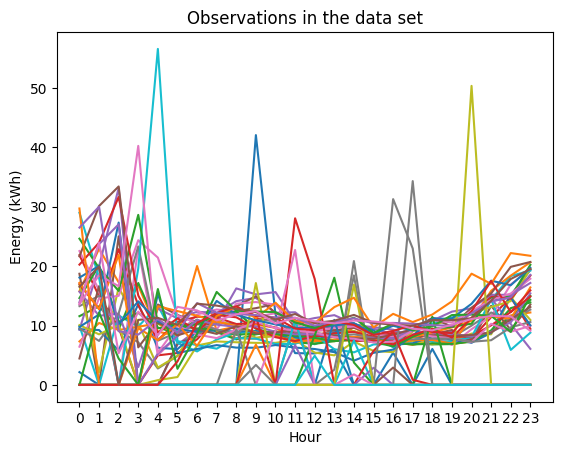

In [16]:
plt.plot(user_hourly.T)
plt.title('Observations in the data set')
plt.xlabel('Hour')
plt.ylabel('Energy (kWh)')
plt.show()

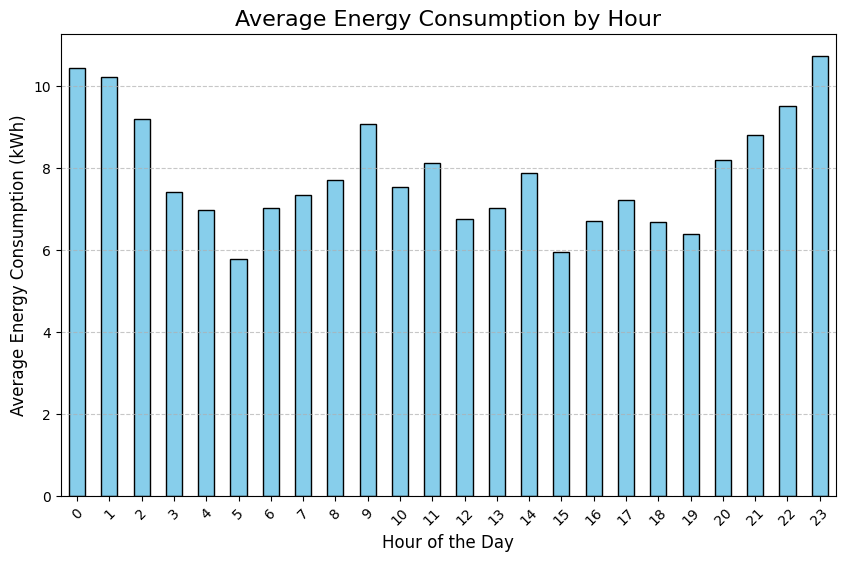

In [17]:
# Calculate the average energy consumption per hour across all users
hourly_avg_energy = user_hourly.mean(axis=0)

# Plot the bar chart
plt.figure(figsize=(10, 6))
hourly_avg_energy.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Energy Consumption by Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Energy Consumption (kWh)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


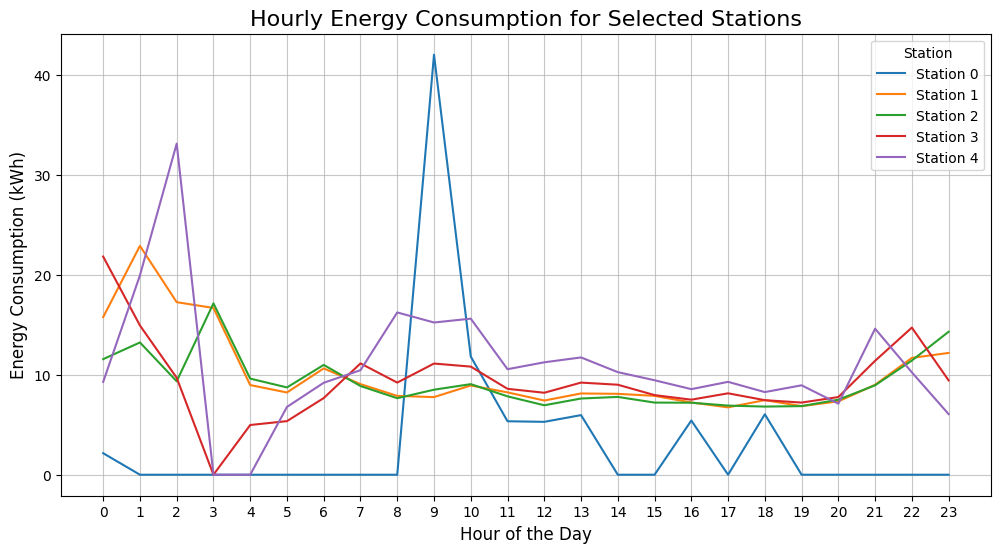

In [18]:
# Select a subset of users (e.g., first 5 users)
subset_station = user_hourly.head(5)

# Plot energy consumption for selected users
plt.figure(figsize=(12, 6))
for station_name in subset_station.index:
    plt.plot(subset_station.columns, subset_station.loc[station_name], label=f"Station {station_name}")

plt.title("Hourly Energy Consumption for Selected Stations", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Energy Consumption (kWh)", fontsize=12)
plt.legend(title="Station")
plt.grid(alpha=0.7)
plt.show()


# Model number and port type
---

## Data preparation for Model number and port type

# **Mandatory Component**
---

## **1: Cluster**